# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [27]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [28]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [29]:
# Extract the numerical part of 'Mileage', 'Engine', and 'Power'
data['Mileage'] = data['Mileage'].str.extract(r'(\d+.\d+)').astype(float)
data['Engine'] = data['Engine'].str.extract(r'(\d+)').astype(float)
data['Power'] = data['Power'].str.extract(r'(\d+.\d+)').astype(float)

# Check for missing values
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                1104
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Drop the 'New Price' columns
data = data.drop(columns=['New_Price'])

# Fill missing values with mean
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)
data['Engine'].fillna(data['Engine'].mean(), inplace=True)
data['Power'].fillna(data['Power'].mean(), inplace=True)
data['Seats'].fillna(data['Seats'].mean(), inplace=True)

v = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
data = pd.get_dummies(data, columns=v, drop_first=True)
data = data.drop(columns=['Unnamed: 0'])
data['Price'] = np.log1p(data['Price'])

# Split the data
X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test

(0.008171764479125718, 0.12257537561741362)

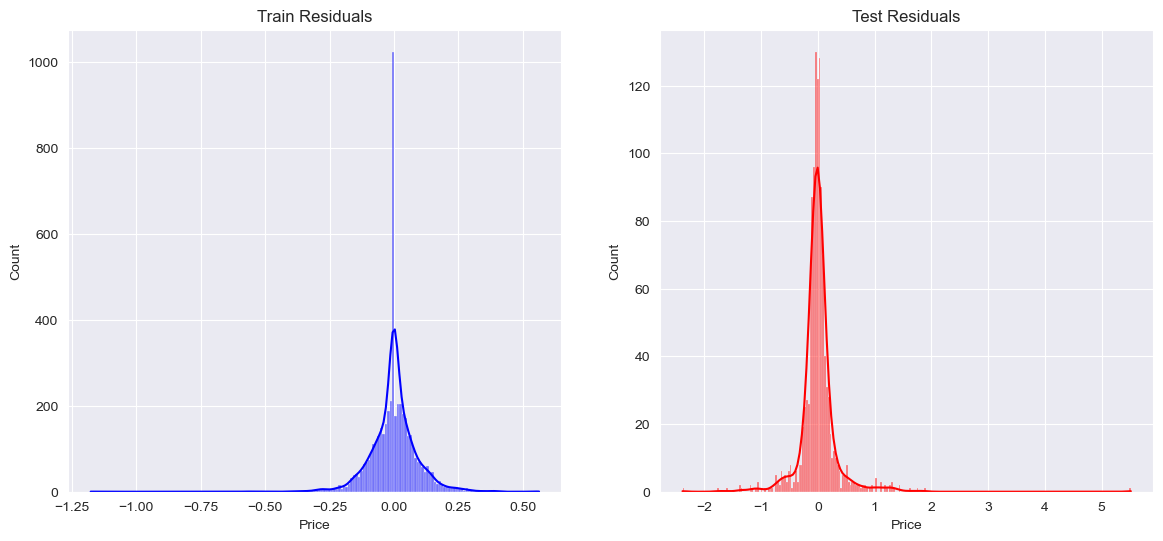

(6.248293678925909e-14, 0.003359341073876621)

In [32]:
# Compute residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot histograms of residuals
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(residuals_train, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Train Residuals')

sns.histplot(residuals_test, kde=True, ax=axs[1], color='red')
axs[1].set_title('Test Residuals')

plt.show()

# Check the mean of residuals
residuals_train_mean = residuals_train.mean()
residuals_test_mean = residuals_test.mean()

residuals_train_mean, residuals_test_mean

In [ ]:
"""
1. 히스토그램을 보면, 잔차의 분포가 양쪽으로 조금 치우친 것을 볼 수 있지만, 대체로 정규 분포를 따르는 것으로 보인다..

2. 잔차의 평균을 확인해보면, 훈련 데이터의 잔차 평균은 거의 0에 가깝고, 테스트 데이터의 잔차 평균은 약 0.0086이다.
   회귀 모델의 가정 중 하나는 오차의 평균이 0이라는것이므로, 이 결과는 모델이 이 가정을 잘 만족하고 있음을 나타낸다.

따라서, 이 회귀 모델은 데이터에 잘 적합되었음을 확인할 수 있다.
"""